In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [3]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [4]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [ ]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
# Download necessary datasets
nltk.download('stopwords')
nltk.download('wordnet')
# Read dataset (adjust the path if necessary)
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Reviews.csv', nrows=500)
# Ensure column name exists
if 'Text' not in df.columns:
    raise KeyError("Column 'Text' not found in the dataset. Check column names.")
# Lowercase all text
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Remove punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)
# Remove stopwords
stop = set(stopwords.words('english'))  # Use a set for faster lookup
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
# Display first few rows
print(df['Text'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
%pip install textblob


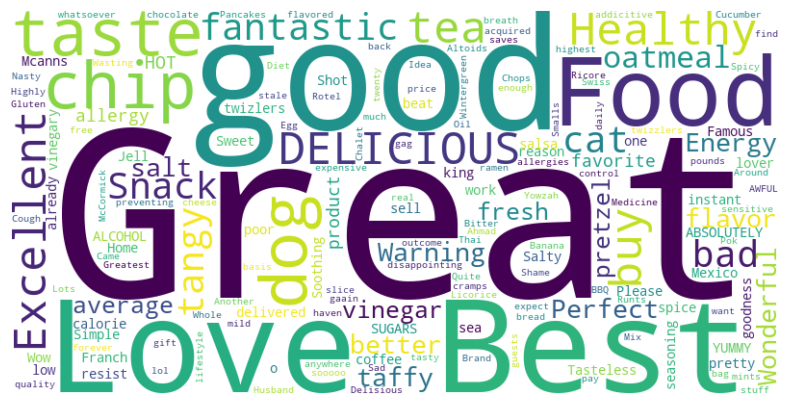

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Ensure dataset is loaded
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Reviews.csv', nrows=500)
# Create a sample of reviews (modify as needed)
reviews_sample = df.sample(100)  # Select 100 random rows
# Fill missing values in 'Summary'
reviews_sample['Summary'] = reviews_sample['Summary'].fillna("")
# Convert 'Summary' column to a single string
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(reviews_str)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


NameError: name 'reviews' is not defined

In [13]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


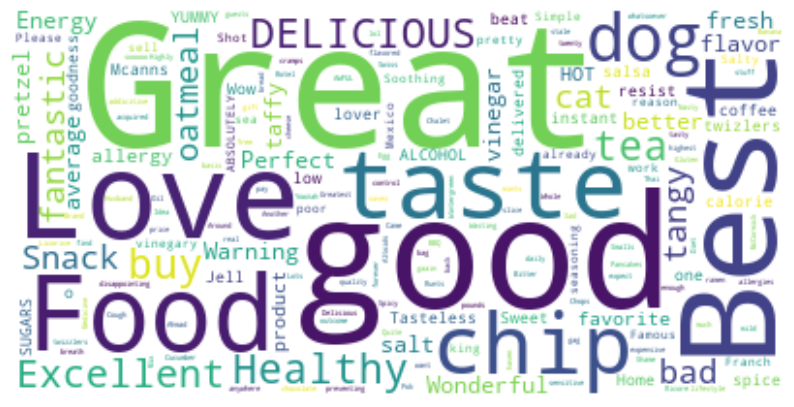

In [7]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()